## checking whether path and images working fine

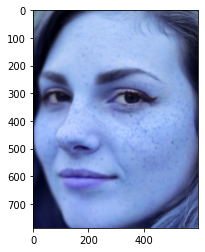

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DataDir="E:\Python Jupyter\Gender-Detection-master\Gender-Detection-master\gender_dataset_face"
CATEGORIES=['woman','man']
for category in CATEGORIES:
    path=os.path.join(DataDir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)#converting image to grayscale
        plt.show()
        break
    break
        

In [2]:
img_array#array of particular image

array([[[ 82, 124, 106],
        [ 82, 124, 106],
        [ 82, 124, 106],
        ...,
        [ 99, 112, 144],
        [100, 113, 145],
        [ 99, 110, 142]],

       [[ 84, 126, 109],
        [ 83, 125, 108],
        [ 83, 125, 108],
        ...,
        [ 96, 109, 141],
        [ 94, 107, 139],
        [ 95, 106, 138]],

       [[ 87, 128, 113],
        [ 85, 126, 111],
        [ 84, 125, 110],
        ...,
        [ 93, 105, 139],
        [ 91, 103, 137],
        [ 89, 101, 135]],

       ...,

       [[ 12,  14,  49],
        [ 12,  14,  49],
        [ 12,  14,  49],
        ...,
        [ 79,  99, 157],
        [ 85, 105, 163],
        [ 85, 105, 163]],

       [[ 12,  14,  49],
        [ 12,  14,  49],
        [ 12,  14,  49],
        ...,
        [ 84, 104, 162],
        [ 90, 110, 168],
        [ 87, 109, 167]],

       [[ 12,  14,  49],
        [ 12,  14,  49],
        [ 12,  14,  49],
        ...,
        [ 88, 107, 168],
        [ 93, 112, 173],
        [ 89, 110, 171]]

## Checking whether resizing working fine

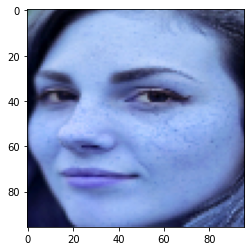

In [3]:
IMG_SIZE=96
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

## appending (array,index value) to training list

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DataDir,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
        
        
    

In [5]:
print(training_data[:20])

[[array([[[ 84, 122, 114],
        [102, 136, 143],
        [111, 144, 158],
        ...,
        [110, 126, 162],
        [ 99, 112, 147],
        [ 93, 106, 142]],

       [[102, 135, 144],
        [107, 140, 151],
        [116, 149, 167],
        ...,
        [ 87,  98, 131],
        [102, 118, 155],
        [103, 120, 157]],

       [[103, 139, 138],
        [115, 149, 163],
        [118, 148, 175],
        ...,
        [103, 115, 151],
        [ 87,  98, 126],
        [ 93, 104, 139]],

       ...,

       [[ 14,  14,  54],
        [ 14,  14,  60],
        [ 15,  17,  65],
        ...,
        [ 91, 110, 175],
        [ 48,  65, 114],
        [ 75,  86, 145]],

       [[ 11,  14,  52],
        [ 14,  16,  57],
        [ 16,  17,  61],
        ...,
        [ 78,  97, 153],
        [ 66,  81, 133],
        [ 54,  69, 125]],

       [[ 11,  14,  52],
        [ 12,  13,  56],
        [ 14,  15,  59],
        ...,
        [ 72,  90, 149],
        [ 80, 100, 159],
        [ 78,  97, 154

## Shuffling data

In [6]:
import random
random.shuffle(training_data)

In [7]:
x=[]
y=[]
X=[]


In [8]:
for features,label in training_data:
    x.append(features)
    y.append(label)
X=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,3)
X.shape

(2307, 96, 96, 3)

In [9]:
new_array.shape

(96, 96, 3)

In [10]:
X=X/255.0
y=np.array(y)

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn.fit(X, y, epochs=10)

Epoch 1/10
73/73 [==============================] - 12s 165ms/step - loss: 0.6185 - accuracy: 0.6823
Epoch 2/10
73/73 [==============================] - 12s 167ms/step - loss: 0.3174 - accuracy: 0.8734
Epoch 3/10
73/73 [==============================] - 13s 176ms/step - loss: 0.2111 - accuracy: 0.9146
Epoch 4/10
73/73 [==============================] - 13s 174ms/step - loss: 0.1856 - accuracy: 0.9289
Epoch 5/10
73/73 [==============================] - 13s 173ms/step - loss: 0.1494 - accuracy: 0.9436
Epoch 6/10
73/73 [==============================] - 13s 179ms/step - loss: 0.1276 - accuracy: 0.9510
Epoch 7/10
73/73 [==============================] - 14s 189ms/step - loss: 0.1096 - accuracy: 0.9580
Epoch 8/10
73/73 [==============================] - 14s 189ms/step - loss: 0.0749 - accuracy: 0.9731
Epoch 9/10
73/73 [==============================] - 13s 175ms/step - loss: 0.0671 - accuracy: 0.9757
Epoch 10/10
73/73 [==============================] - 13s 180ms/step - loss: 0.0461 - accura

In [13]:
#### #Evaluating Test

testing_data=[]
path_test=r"C:\Users\SNEHAL\Pictures\Saved Pictures"
# img=os.listdir(path_test)[5]
# def create_testing_data():
#     for category in CATEGORIES:
#         path_test=os.path.join(DataDir,category)
#         class_num=CATEGORIES.index(category)
#         for img in os.listdir(path_test):
#             try:
#                 img1_array=cv2.imread(os.path_test.join(path_test,img),cv2.IMREAD_GRAYSCALE)
#                 new1_array=cv2.resize(img1_array,(IMG_SIZE,IMG_SIZE))
#                 testing_data.append([new1_array,class_num])
#             except Exception as e:
#                 pass
# create_testing_data()
img1_array=cv2.imread("boy.jpg")
new1_array=cv2.resize(img1_array,(IMG_SIZE,IMG_SIZE))
new1_array=new1_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
np.argmax(cnn.predict(new1_array))
# plt.imshow(new1_array)
# plt.show()
# print(new1_array.shape)

1

In [14]:
cnn.save ("genderDetection.model")

INFO:tensorflow:Assets written to: genderDetection.model\assets


In [36]:
##lets test  datsets
path="E:Python Jupyter/Gender-Detection-master/Gender-Detection-master/gender_dataset_face/man"
count=0
count_img=0
for img in os.listdir(path):
    img1_array=cv2.imread(os.path.join(path,img))
    
    new1_array=cv2.resize(img1_array,(96,96))
    new1_array=new1_array.reshape(-1,IMG_SIZE,IMG_SIZE,3)
    value=np.argmax(cnn.predict(new1_array))
    count_img+=1
    if value==1:
        count+=1 
    
    
count
        
print(count,count_img,len(os.listdir(path)))

1167 1173 1173
